<a href="https://colab.research.google.com/github/myielin/dataMiningUTFPR/blob/master/heartFailure/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### imports e inicialização da base de dados

[link do repositório no Github](https://github.com/myielin/dataMiningUTFPR/tree/master/heartFailure)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/myielin/dataMiningUTFPR/master/heartFailure/heart.csv")

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Exercício 1

**Apresentar a media, moda, variância e desvio padrão para todos os atributos da base**

O método describe de Pandas apresenta todos os valores de estatística descritiva apontados, exceto a moda:

In [ ]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Também é possível obter cada valor individualmente:

In [ ]:
print("médias: \n", dados.mean(numeric_only = True))    # o argumento para valor numérico é verdadeiro por padrão
print("\nmodas: \n",dados.mode().T)                     # .T = matriz transposta pode melhorar a visualização
print("\nvariâncias: \n", dados.var())
print("\ndesvios: \n", dados.std())

médias: 
 Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

modas: 
                      0
Age                 54
Sex                  M
ChestPainType      ASY
RestingBP          120
Cholesterol          0
FastingBS            0
RestingECG      Normal
MaxHR              150
ExerciseAngina       N
Oldpeak            0.0
ST_Slope          Flat
HeartDisease         1

variâncias: 
 Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

desvios: 
 Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64


### Exercício 2

**Apresentar os valores da mediana e quartil utilizando o grafico de caixas (boxplot)**

aqui é criado um dataframe contendo todos os valores do primeiro quartil, mediana e terceiro quartil, assim como é possível ver no método describe.

Valores categóricos que não possuem mediana não são representados 

In [ ]:
dados_numericos = ["Age", "RestingBP", "Cholesterol", "MaxHR","Oldpeak", "HeartDisease"]

In [ ]:
vals = { 'q1 (0.25)': dados.quantile(0.25),
         'q2 (0.50)': dados.quantile(0.5),
         'q3 (0.75)': dados.quantile(0.75) }

valsd = pd.DataFrame(vals, index=dados_numericos)
valsd

,q1 (0.25),q2 (0.50),q3 (0.75)
Age,47.00,54.0,60.0
RestingBP,120.00,130.0,140.0
Cholesterol,173.25,223.0,267.0
MaxHR,120.00,138.0,156.0
Oldpeak,0.00,0.6,1.5
HeartDisease,0.00,1.0,1.0


Aqui são plotados todas as variáveis juntas:

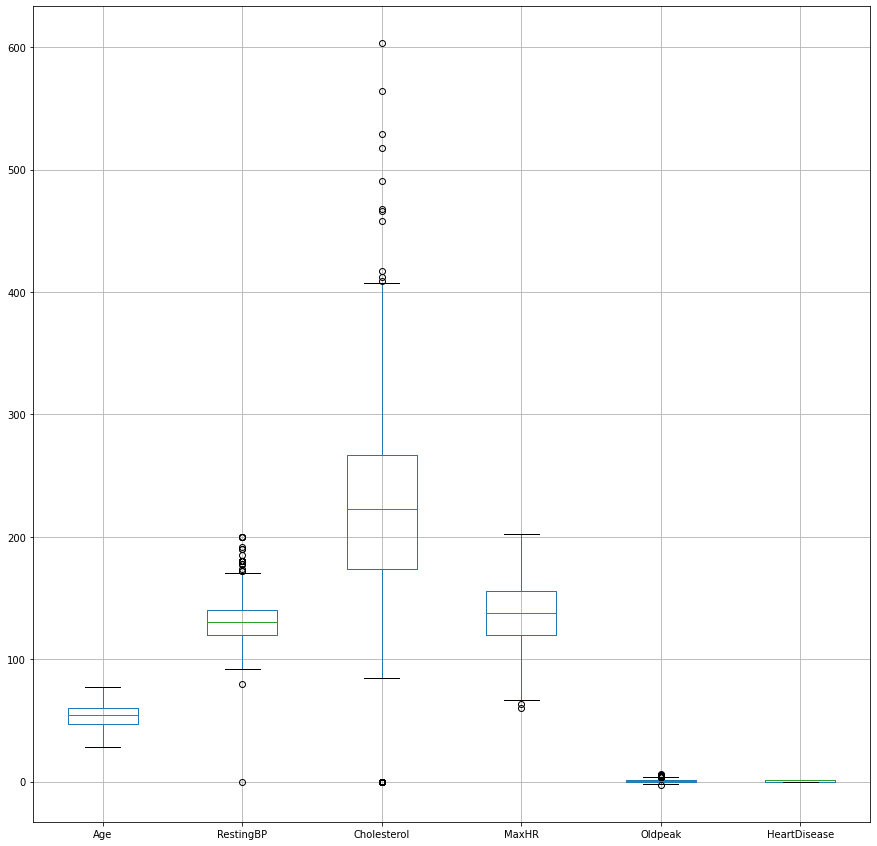

In [ ]:
dados.boxplot(dados_numericos, figsize=(15, 15))

aqui serão plotadas separadamente:

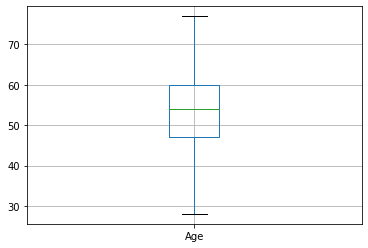

In [ ]:
dados.boxplot("Age")

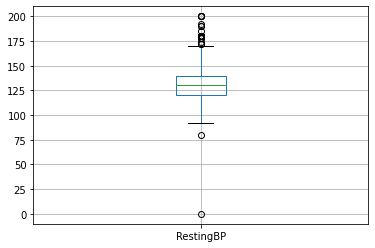

In [ ]:
dados.boxplot("RestingBP")

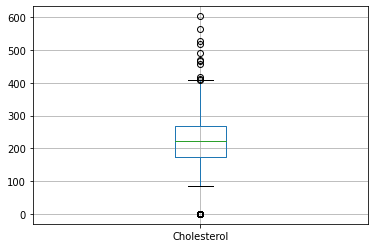

In [ ]:
dados.boxplot("Cholesterol")

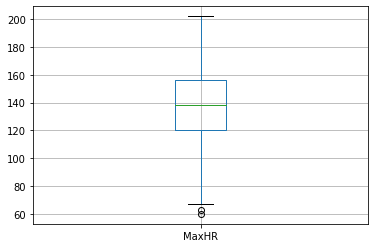

In [ ]:
dados.boxplot("MaxHR")

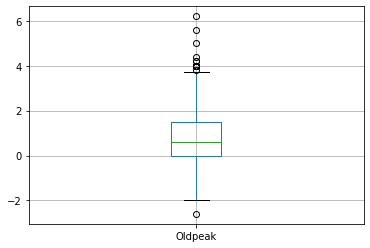

In [ ]:
dados.boxplot("Oldpeak")

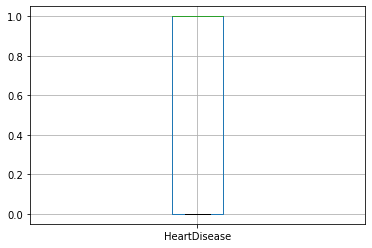

In [ ]:
dados.boxplot("HeartDisease")

### Exercício 3

**Refazer os exercıcios 1 e 2 separando os dados pelas respectivas classes do problema**

Inicialmente o objetivo é utilizar o que seria a variável dependente (presença ou não da doença cardíaca, ultima coluna) para separar o conjunto em duas classes:
- 1: possui a doença
- 0: não possui

In [30]:
dados["HeartDisease"].unique()   # checando se os valores realmente só variam entre 0 e 1

array([0, 1])

In [37]:
# criando um novo dataframe para cada classe:

doentes = dados[dados["HeartDisease"] == 1]
saudaveis = dados[dados["HeartDisease"] == 0]

##### Ex 3.1: analisar os valores de estatística descritiva

In [39]:
doentes.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [45]:
doentes.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,58.0,M,ASY,120,0.0,0.0,Normal,120.0,Y,0.0,Flat,1.0
1,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
doentes.var()

Age                76.161499
RestingBP         393.176738
Cholesterol     15974.785460
FastingBS           0.223097
MaxHR             546.948155
Oldpeak             1.326809
HeartDisease        0.000000
dtype: float64

In [74]:
saudaveis.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


In [48]:
saudaveis.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ATA,120,0,0,Normal,150,N,0.0,Up,0


In [49]:
saudaveis.var()

Age               89.206417
RestingBP        272.236293
Cholesterol     5570.332280
FastingBS          0.096034
MaxHR            542.334045
Oldpeak            0.489593
HeartDisease       0.000000
dtype: float64

##### Ex 3.2: observar os quartis e boxplots

In [55]:
quartis = { 'doentes q1 (0.25)': doentes.quantile(0.25),
            'doentes q2 (0.50)': doentes.quantile(0.5),
            'doentes q3 (0.75)': doentes.quantile(0.75),
            'saudáveis q1 (0.25)': saudaveis.quantile(0.25),
            'saudáveis q2 (0.50)': saudaveis.quantile(0.5),
            'saudáveis q3 (0.75)': saudaveis.quantile(0.75)
            }

quartisd = pd.DataFrame(quartis, index=dados_numericos)
quartisd

,doentes q1 (0.25),doentes q2 (0.50),doentes q3 (0.75),saudáveis q1 (0.25),saudáveis q2 (0.50),saudáveis q3 (0.75)
Age,51.0,57.0,62.00,43.00,51.0,57.00
RestingBP,120.0,132.0,145.00,120.00,130.0,140.00
Cholesterol,0.0,217.0,267.00,197.25,227.0,266.75
MaxHR,112.0,126.0,144.25,134.00,150.0,165.00
Oldpeak,0.0,1.2,2.00,0.00,0.0,0.60
HeartDisease,1.0,1.0,1.00,0.00,0.0,0.00


Para plotar todos os gráficos simultaneamente as variáveis tiveram mudança de escala, facilitando a visualização:

In [81]:
bx = dados[dados_numericos].apply(lambda x: x/x.max())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2352d30750>,
      dtype=object)

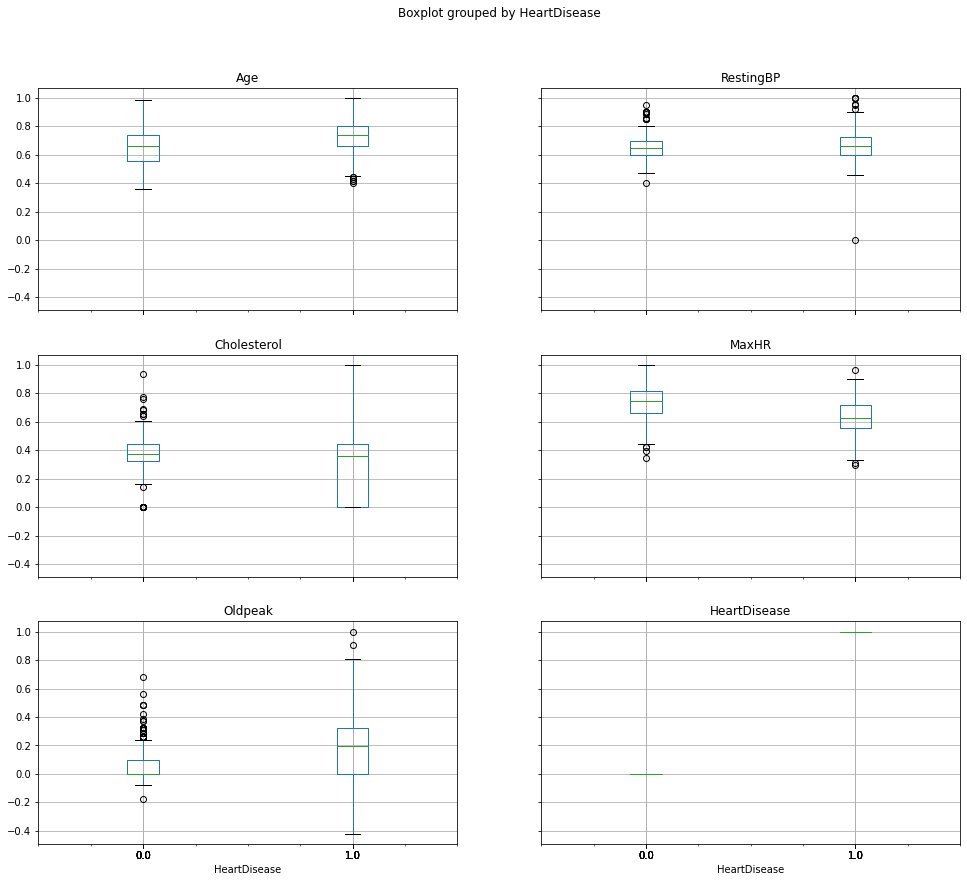

In [90]:
bx.boxplot(dados_numericos, figsize=(16, 14), by="HeartDisease")

Plots das variáveis individuais:

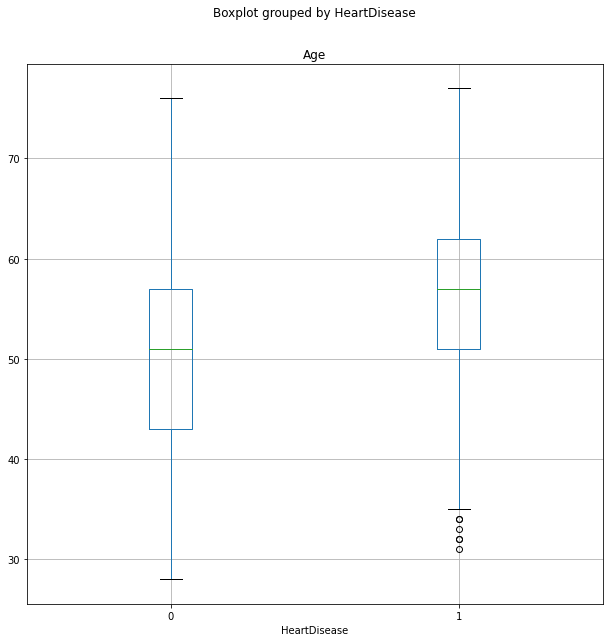

In [87]:
dados.boxplot("Age", by = "HeartDisease", figsize= (10, 10))

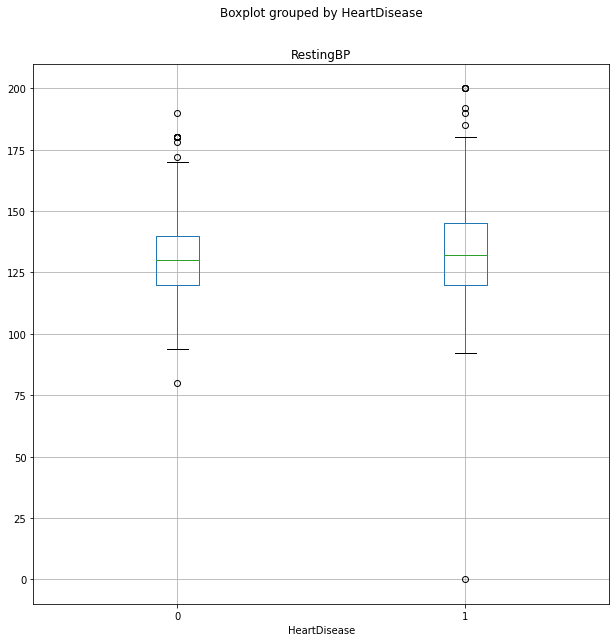

In [88]:
dados.boxplot("RestingBP", by = "HeartDisease", figsize= (10, 10))

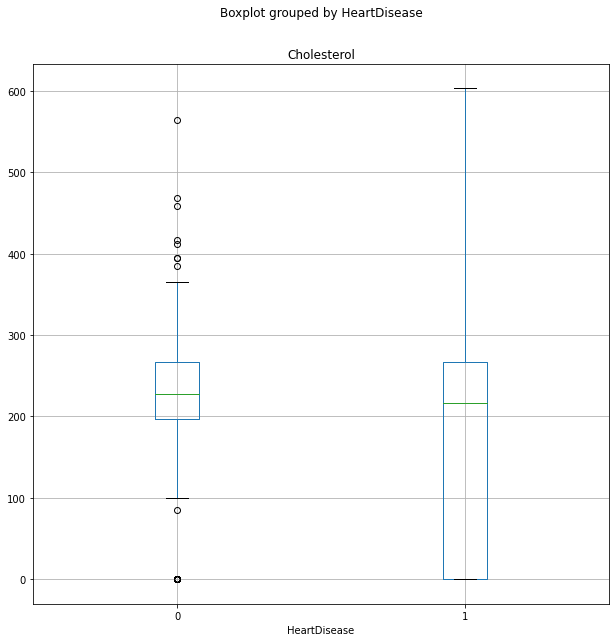

In [91]:
dados.boxplot("Cholesterol", by = "HeartDisease", figsize= (10, 10))

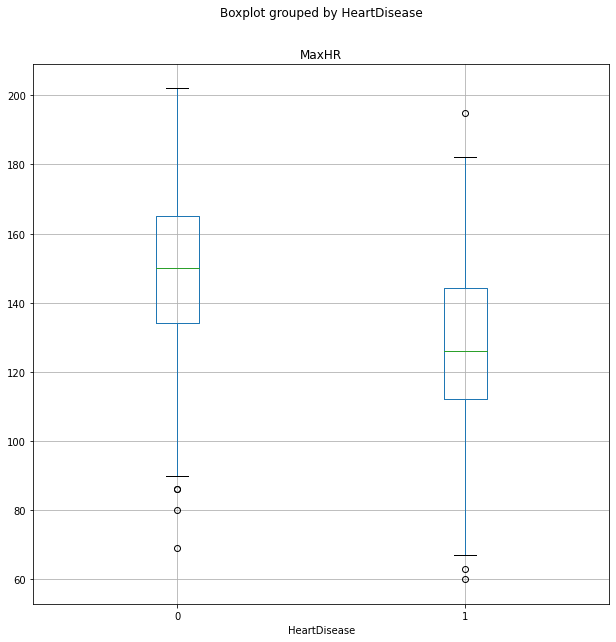

In [93]:
dados.boxplot("MaxHR", by = "HeartDisease", figsize= (10, 10))

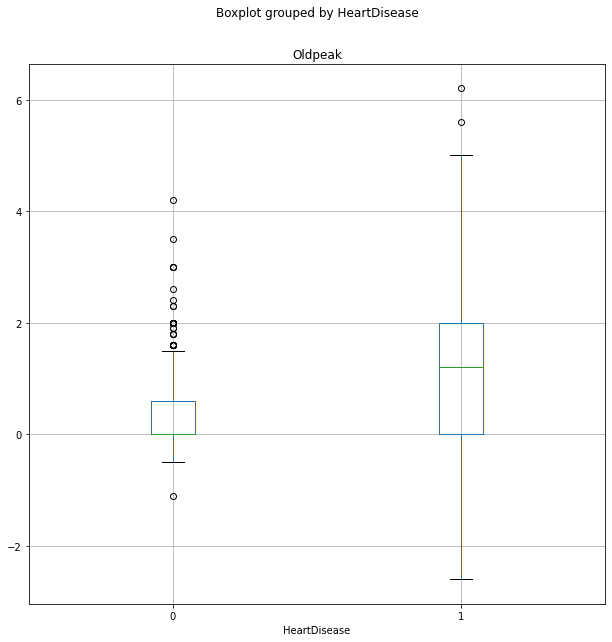

In [94]:
dados.boxplot("Oldpeak", by = "HeartDisease", figsize= (10, 10))

### Exercício 4

**Refazer o item 1 utilizando uma amostragem estratificada de 50% da base
de dados.**

Inicialmente será realizada uma contagem para verificar a proporção de cada valor no conjunto

In [102]:
# valores inteiros

dados["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [103]:
# porcentagens

dados["HeartDisease"].value_counts()/918

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Seguindo as proporções, o objetivo é criar uma amostra de:
- 50% de 918 = 459 dados, 
sendo:
- 55,3377% de 459 = 254 dados de pessoas doentes (1) 
e:
- 44,6623% de 459 = 205 dados de pessoas saudáveis (0)  

In [120]:
amostra = pd.concat([doentes.sample(254), saudaveis.sample(205)])
amostra["HeartDisease"].value_counts()

1    254
0    205
Name: HeartDisease, dtype: int64

Para visualizar alguns dados aleatórios da amostra:

In [123]:
amostra.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
463,51,M,ASY,128,0,0,Normal,107,N,0.0,Up,0
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1
204,56,M,ATA,130,184,0,Normal,100,N,0.0,Up,0
886,52,M,NAP,138,223,0,Normal,169,N,0.0,Up,0
329,60,M,ASY,130,0,1,ST,130,Y,1.1,Down,1
156,38,M,ASY,110,190,0,Normal,150,Y,1.0,Flat,1
33,41,M,ASY,130,172,0,ST,130,N,2.0,Flat,1
313,34,M,ASY,115,0,1,Normal,154,N,0.2,Up,1


Visualizando os valores de estatística descritiva:

In [140]:
# aqui a linha indexada como 0 é a moda

desc_amostra = pd.concat([amostra.describe(), amostra.mode(numeric_only=True)])
desc_amostra

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,53.834423,131.509804,199.808279,0.246187,136.956427,0.870588,0.553377
std,9.678615,17.898593,108.321323,0.431259,25.020478,1.009489,0.497685
min,28.000000,92.000000,0.000000,0.000000,63.000000,-2.600000,0.000000
25%,48.000000,120.000000,175.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.500000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,4.400000,1.000000
0,54.000000,120.000000,0.000000,0.000000,140.000000,0.000000,1.000000
